### EDA_Tanja
Careful on:
- "Among the 'Measure' types, 'Personal Vehicle Passengers', 'Bus Passengers','Pedestrians' and 'Train Passengers' count people, whereas the others count vehicles."
- ** Careful on combining Empty/Full Trucks or Trains**
- data from 1996 to 2019

**Check data cleaning**

-> Convert date to date time

In [1]:
# import useful libraries
import pandas as pd
import numpy as np

In [2]:
# load cleaned data with positions
df = pd.read_csv("../data/DataWithLocationCleaned.zip")
# display head of df
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
0,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Full,133,2019,Jun,"(48.905266, -95.314404)"
1,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Truck Containers Empty,298,2019,Jun,"(48.905266, -95.314404)"
2,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicles,10383,2019,Jun,"(48.905266, -95.314404)"
3,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Personal Vehicle Passengers,19459,2019,Jun,"(48.905266, -95.314404)"
4,Warroad,Minnesota,3423,US-Canada Border,2019-06-01,Pedestrians,2,2019,Jun,"(48.905266, -95.314404)"


In [3]:
# check if date is datetime
df.dtypes
# convert 'Date' to date format
df['Date'] = pd.to_datetime(df['Date'])
# recheck data type of 'Date'
df.dtypes

Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
Year                  int64
Month                object
position             object
dtype: object

In [4]:
# check number of rows and columns 
df.shape

(349172, 10)

In [5]:
# check recorded date interval
print('First date in df: ' + str(df.Date.min()))
print('Last date in df: ' + str(df.Date.max()))

First date in df: 1996-01-01 00:00:00
Last date in df: 2019-06-01 00:00:00


**Simple queries**

In [6]:
# check most visited ports from 2018
df[df.Date >= '2018-01-01'].sort_values(['Date', 'Value'], ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
517,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,2176784,2019,Jun,"(32.5520013, -117.0430813)"
228,El Paso,Texas,2402,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,1408249,2019,Jun,"(31.7600372, -106.487287)"
518,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicles,1246491,2019,Jun,"(32.5520013, -117.0430813)"
309,Buffalo-Niagara Falls,New York,901,US-Canada Border,2019-06-01,Personal Vehicle Passengers,1010150,2019,Jun,"(43.0761171, -78.9928794)"
506,Otay Mesa,California,2506,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,971669,2019,Jun,"(32.560058, -116.9361338)"


In [7]:
# check most visited ports from 2016
df[df.Date >= '2016-01-01'].sort_values(['Date', 'Value'], ascending=False).head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Year,Month,position
517,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,2176784,2019,Jun,"(32.5520013, -117.0430813)"
228,El Paso,Texas,2402,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,1408249,2019,Jun,"(31.7600372, -106.487287)"
518,San Ysidro,California,2504,US-Mexico Border,2019-06-01,Personal Vehicles,1246491,2019,Jun,"(32.5520013, -117.0430813)"
309,Buffalo-Niagara Falls,New York,901,US-Canada Border,2019-06-01,Personal Vehicle Passengers,1010150,2019,Jun,"(43.0761171, -78.9928794)"
506,Otay Mesa,California,2506,US-Mexico Border,2019-06-01,Personal Vehicle Passengers,971669,2019,Jun,"(32.560058, -116.9361338)"


In [9]:
# see how many pedestrians crossed the borders from 1996
df.query('Measure == "Pedestrians"').Value.sum()

1056699751

In [10]:
# see how many personal vehicles crossed the borders from 1996
df.query('Measure == "Personal Vehicles"').Value.sum()

2584776249

**Simple profiling report**

In [144]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

**Focus on measures**

In [11]:
# check number of unique elements in 'Measure' 
print('Number of different measures : {}' .format(len(df['Measure'].unique())))

Number of different measures : 12


In [12]:
# see the different measures
df['Measure'].unique()


array(['Truck Containers Full', 'Truck Containers Empty',
       'Personal Vehicles', 'Personal Vehicle Passengers', 'Pedestrians',
       'Buses', 'Bus Passengers', 'Trucks', 'Trains', 'Train Passengers',
       'Rail Containers Full', 'Rail Containers Empty'], dtype=object)

In [13]:
# see number of crossings depending on the measure
df_measure = df[['Measure','Value']].groupby('Measure').sum()
df_measure

,Value
Measure,
Bus Passengers,143388212
Buses,8604318
Pedestrians,1056699751
Personal Vehicle Passengers,5504073464
Personal Vehicles,2584776249
Rail Containers Empty,21477185
Rail Containers Full,38891558
Train Passengers,6287351
Trains,912969


In [14]:
# see number of crossings depending on border
df_measure = df[['Border','Value']].groupby(['Border']).sum()
df_measure

,Value
Border,
US-Canada Border,2712940816
US-Mexico Border,7153328223


**Focus on measures for people counting**

In [15]:
# separate measure of people counting
people = df[df['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]


In [16]:
# see number of people depending on borders
df_people = people[['Border','Value']].groupby('Border').sum()
df_people

,Value
Border,
US-Canada Border,1645990588
US-Mexico Border,5064458190


Text(0.5, 1.0, 'Number of people crossing borders')

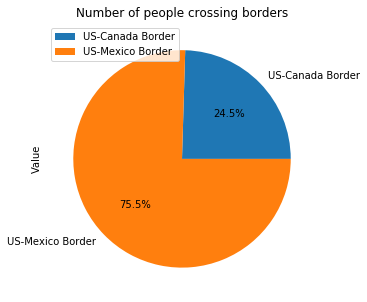

In [18]:
# piechart
# import useful library
import matplotlib.pyplot as plt
df_people_pie = pd.DataFrame({'Value': [1645990588,5064458190]},index=['US-Canada Border', 'US-Mexico Border'])
df_people_pie.plot.pie(subplots=True, figsize=(5, 5),autopct='%1.1f%%')
plt.title('Number of people crossing borders')

In [19]:
# better piechart

# set parameters
#val_p = [1645990588,5064458190]
#lab_p = 'US-Canada Border', 'US-Mexico Border'
#plt.pie(val_p,labels= lab_p,autopct='%1.1f%%')
#plt.title('Number of people crossing borders')
#plt.show()

In [20]:
# consider people counting measures, sum value and set date as index
df_date = people[['Date','Border','Value']].set_index('Date')
# group by date and border
df_date = df_date.groupby(['Date', 'Border']).sum()
df_date.head(10)

Value
Date       Border                    
1996-01-01 US-Canada Border   6329802
           US-Mexico Border  17303826
1996-02-01 US-Canada Border   6774801
           US-Mexico Border  16648997
1996-03-01 US-Canada Border   7188110
           US-Mexico Border  18571812
1996-04-01 US-Canada Border   8098225
           US-Mexico Border  18113328
1996-05-01 US-Canada Border   9171578
           US-Mexico Border  18272632

In [23]:
# check number of unique years
#years = df['Date'].map(lambda x : x.year).unique()
#years

In [22]:
# see number of unique years
df['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996])

In [24]:
# consider people counting measure, sum value and set date.year as index
df_date_year = people[['Date','Border','Value']].set_index('Date')
df_date_year.index = pd.to_datetime(df_date_year.index)

# group by date.year and border
df_date_year = df_date_year.groupby([df_date_year.index.year, 'Border']).sum()
df_date_year.head(10)






Value
Date Border                     
1996 US-Canada Border  105762398
     US-Mexico Border  207586832
1997 US-Canada Border   97570223
     US-Mexico Border  261050472
1998 US-Canada Border   93097261
     US-Mexico Border  274125727
1999 US-Canada Border   94573669
     US-Mexico Border  293109831
2000 US-Canada Border   95776909
     US-Mexico Border  290368364

In [25]:
# histogram
# import useful library
# do first pip install plotly==4.3.0 in terminal
import plotly.graph_objects as go


In [28]:
# set parameters
val_m = df_date_year.loc(axis=0)[:,'US-Mexico Border'].values.flatten().tolist()
val_c = df_date_year.loc(axis=0)[:,'US-Canada Border'].values.flatten().tolist()
years = df_date_year.unstack(level=1).index.values

# configure bar chart 
fig = go.Figure(data=[
    go.Bar(name='US-Mexico Border', x= years, y= val_m), 
    go.Bar(name='US-Canada Border', x= years, y= val_c)])

# change bar mode
fig.update_layout(title = 'People entering US by years and borders', barmode='group')
fig.show()

In [30]:
# consider people counting measure, sum values and set date as index
df_dm = people[['Date','Measure','Value']].set_index('Date')
df_dm.index = pd.to_datetime(df_dm.index)

# group by date.years and measures
df_dm = df_dm.groupby([df_dm.index.year,'Measure']).sum()
df_dm.head(10)

Value
Date Measure                               
1996 Bus Passengers                 5813778
     Pedestrians                   34717351
     Personal Vehicle Passengers  272593220
     Train Passengers                224881
1997 Bus Passengers                 6896919
     Pedestrians                   44461186
     Personal Vehicle Passengers  307001980
     Train Passengers                260610
1998 Bus Passengers                 7608484
     Pedestrians                   45060023

In [31]:
# stacked bar chart 
# set parameters
val_bp = df_dm.loc(axis=0)[:,'Bus Passengers'].values.flatten().tolist()
val_ped = df_dm.loc(axis=0)[:,'Pedestrians'].values.flatten().tolist()
val_pvp = df_dm.loc(axis=0)[:,'Personal Vehicle Passengers'].values.flatten().tolist()
val_tp = df_dm.loc(axis=0)[:,'Train Passengers'].values.flatten().tolist()

# configure stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Bus Passengers', x= years, y= val_bp), 
    go.Bar(name='Pedestrians', x= years, y= val_ped),
    go.Bar(name='Personal Vehicle Passengers', x= years, y= val_pvp),
    go.Bar(name='Train Passengers', x= years, y= val_tp)])

# change bar mode to stack
fig.update_layout(title = 'People entering US by years and measures', barmode='stack')
fig.show()

**Focus on measures for vehicles counting**

In [32]:
# separate measure of vehicules counting
veh = df[df['Measure'].isin(['Truck Containers Full', 'Truck Containers Empty','Personal Vehicles', 'Buses', 'Trucks', 'Trains', 'Rail Containers Full', 'Rail Containers Empty'])]



In [33]:
# see number of vehicule depending on border
df_veh = veh[['Border','Value']].groupby('Border').sum()
df_veh

,Value
Border,
US-Canada Border,1066950228
US-Mexico Border,2088870033


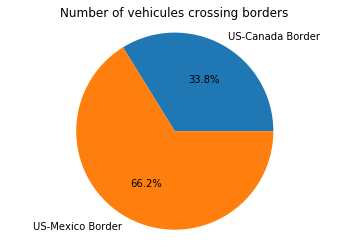

In [34]:
# better piechart
# set parameters
val_veh = [1066950228,2088870033]
lab = 'US-Canada Border', 'US-Mexico Border'
plt.pie(val_veh,labels= lab, autopct='%1.1f%%')
plt.title('Number of vehicules crossing borders')
plt.axis('equal')
plt.show()

In [35]:
# consider vehicles counting measure, sum value and set date.year as index
df_date_year_v = veh[['Date','Border','Value']].set_index('Date')
df_date_year_v.index = pd.to_datetime(df_date_year_v.index)

# group by date.year and border
df_date_year_v = df_date_year_v.groupby([df_date_year_v.index.year, 'Border']).sum()
df_date_year_v.head(10)

Value
Date Border                     
1996 US-Canada Border   47276505
     US-Mexico Border   69164616
1997 US-Canada Border   47942487
     US-Mexico Border   87611016
1998 US-Canada Border   49196829
     US-Mexico Border   92170887
1999 US-Canada Border   51923659
     US-Mexico Border   98849565
2000 US-Canada Border   52012764
     US-Mexico Border  101863505

In [12]:
# histogram
# import useful library
# do first pip install plotly==4.3.0 in terminal
import plotly.graph_objects as go

In [36]:
# set parameters
val_m = df_date_year_v.loc(axis=0)[:,'US-Mexico Border'].values.flatten().tolist()
val_c = df_date_year_v.loc(axis=0)[:,'US-Canada Border'].values.flatten().tolist()
years = df_date_year_v.unstack(level=1).index.values

# configure bar chart 
fig = go.Figure(data=[
    go.Bar(name='US-Mexico Border', x= years, y= val_m), 
    go.Bar(name='US-Canada Border', x= years, y= val_c)])

# change bar mode to group
fig.update_layout(title = 'Vehicles entering US by years and borders', barmode='group')
fig.show()

In [37]:
# consider vehicle counting measure, sum values and set date as index
df_dm_v = veh[['Date','Measure','Value']].set_index('Date')
df_dm_v.index = pd.to_datetime(df_dm_v.index)

# group by date.years and measures
df_dm_v = df_dm_v.groupby([df_dm_v.index.year,'Measure']).sum()
df_dm_v.head(10)

Value
Date Measure                          
1996 Buses                      292789
     Personal Vehicles       101960373
     Rail Containers Empty      268134
     Rail Containers Full       472219
     Trains                      38966
     Truck Containers Empty    1599429
     Truck Containers Full     3124031
     Trucks                    8685180
1997 Buses                      389969
     Personal Vehicles       119003203

In [38]:
# stacked bar chart 
# set parameters
val_b = df_dm_v.loc(axis=0)[:,'Buses'].values.flatten().tolist()
val_tk = df_dm_v.loc(axis=0)[:,'Trucks'].values.flatten().tolist()
val_tke = df_dm_v.loc(axis=0)[:,'Truck Containers Empty'].values.flatten().tolist()
val_tkf = df_dm_v.loc(axis=0)[:,'Truck Containers Full'].values.flatten().tolist()
val_pv = df_dm_v.loc(axis=0)[:,'Personal Vehicles'].values.flatten().tolist()
val_tr = df_dm_v.loc(axis=0)[:,'Trains'].values.flatten().tolist()
val_tre = df_dm_v.loc(axis=0)[:,'Rail Containers Empty'].values.flatten().tolist()
val_trf = df_dm_v.loc(axis=0)[:,'Rail Containers Full'].values.flatten().tolist()

# configure stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Buses', x= years, y= val_b), 
    go.Bar(name='Trucks', x= years, y= val_tk),
    go.Bar(name='Truck Containers Empty', x= years, y= val_tke),
    go.Bar(name='Truck Containers Full', x= years, y= val_tkf),
    go.Bar(name='Personal Vehicles', x= years, y= val_pv),
    go.Bar(name='Trains', x= years, y= val_tr),
    go.Bar(name='Rail Containers Empty', x= years, y= val_tre),
    go.Bar(name='Rail Containers Full', x= years, y= val_trf)])

# change bar mode to stack
fig.update_layout(title = 'Vehicles entering US by years and measures', barmode='stack')
fig.show()

**Overview of all measures**

In [39]:
# see value for each measure
temp = pd.DataFrame(df.groupby(by='Measure')['Value'].sum().sort_values(ascending=False)).reset_index()
print(temp)



                        Measure       Value
0   Personal Vehicle Passengers  5504073464
1             Personal Vehicles  2584776249
2                   Pedestrians  1056699751
3                        Trucks   256762423
4         Truck Containers Full   179543288
5                Bus Passengers   143388212
6        Truck Containers Empty    64852271
7          Rail Containers Full    38891558
8         Rail Containers Empty    21477185
9                         Buses     8604318
10             Train Passengers     6287351
11                       Trains      912969


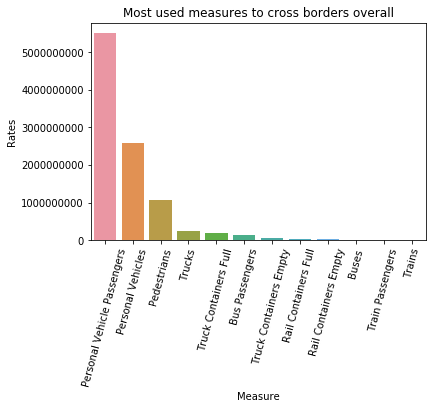

In [41]:
# barchart
# import useful library
import seaborn as sns
# set parameters
plt.figure()
sns.barplot(x=temp['Measure'],y=temp['Value'])
plt.title('Most used measures to cross borders overall')
plt.ylabel('Rates')
plt.xticks(rotation=75)
plt.ticklabel_format(style='plain', axis='y')

del temp

**Focus on comparison between Canada and Mexico**

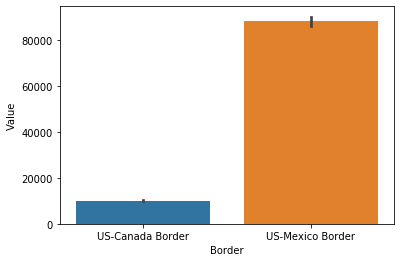

In [46]:
### CHECK VALUES

# barchart
# set parameters
sns.barplot(x='Border', y='Value', data= df)

# display
plt.show()

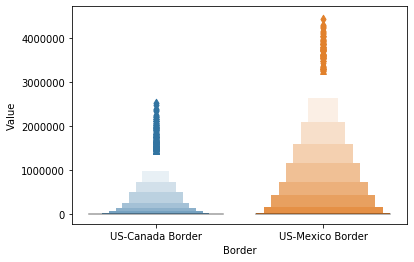

In [47]:
### CHECK VALUES

# boxenchart
# set parameters
sns.boxenplot(x="Border", y="Value", scale="linear", data= df)

# display
plt.show()

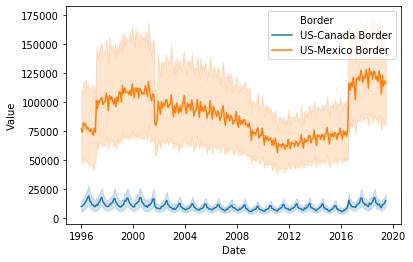

In [48]:
### CHECK VALUES

# lineplot
# set parameters
sns.lineplot(x='Date',y= 'Value',hue= "Border",data= df)

# display
plt.show()

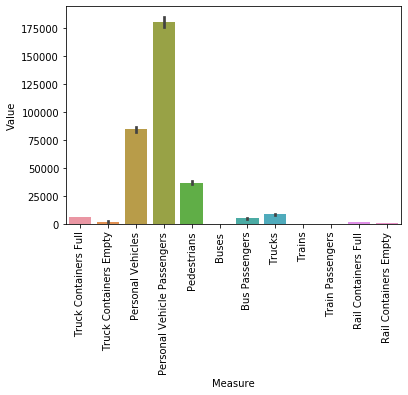

In [49]:
### CHECK VALUES

# barchart
# set parameters
sns.barplot(x='Measure',y= 'Value',data= df)
plt.xticks(rotation=90)

# display
plt.show()

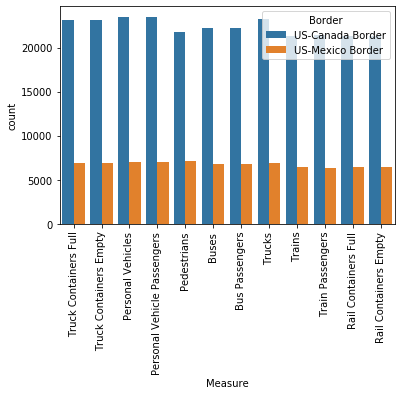

In [50]:
### CHECK VALUES

# barchart
# set parameters
sns.countplot(df['Measure'],hue='Border',data=df)
plt.xticks(rotation=90)

# display
plt.show()


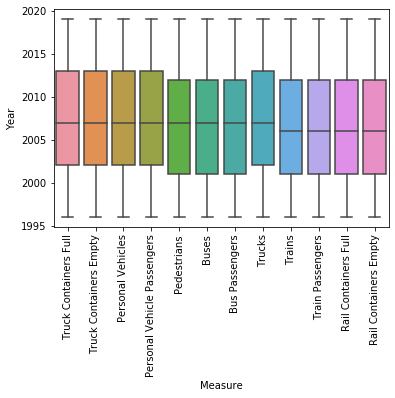

In [51]:
### CHECK VALUES
## DELETE MAYBE
# boxplot
# set parameters
df['Year']= pd.DatetimeIndex(df['Date']).year
sns.boxplot(x='Measure',y= 'Year',data= df)
plt.xticks(rotation=90)

# display
plt.show()

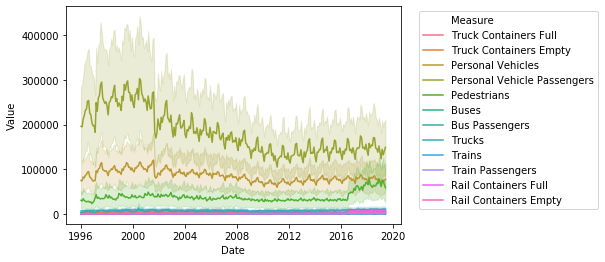

In [64]:
### CHECK VALUES

# lineplot
# set parameters
plt.figure()
sns.lineplot(data = df, x='Date', y='Value', hue='Measure',legend='full')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# display
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x127964080>,
      dtype=object)

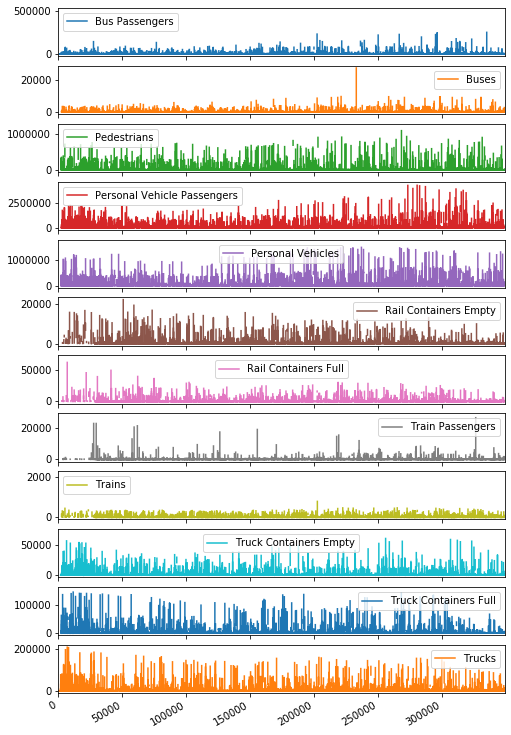

In [65]:
### CHECK VALUES
## DELETE MAYBE

# subplot
# set parameters
df.pivot(columns="Measure", values="Value").plot(subplots=True, figsize=(8,14))

**Focus on states**

In [58]:
# see number of crossings per state
df_state = df.groupby('State').sum()
# drop colum Port Code
df_state = df_state.drop(columns=['Port Code'])
df_state

,Value
State,
Alaska,167292
Arizona,2583220
California,9279563
Idaho,86295
Maine,568538
Michigan,2987501
Minnesota,456620
Montana,377024
New Mexico,463246


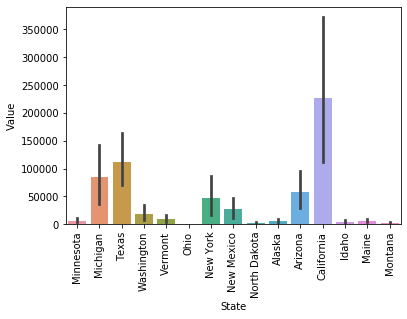

In [76]:
### CHECK VALUES

# barchart
# set parameters
sns.barplot(x='State',y='Value',data=df)
plt.xticks(rotation=90)

# display
plt.show()

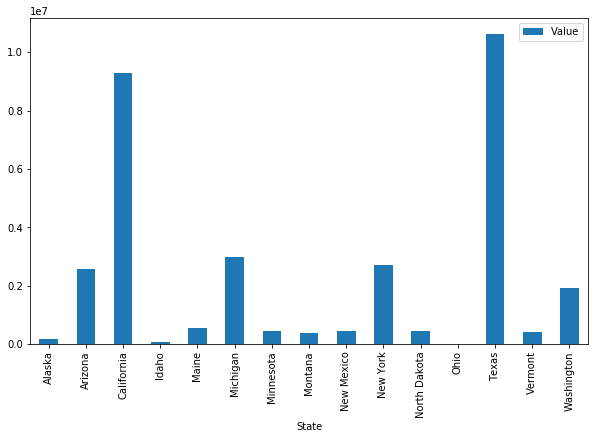

In [73]:
### CHECK VALUES

# barchart
# set parameters
df_state.plot(kind='bar', figsize=(10, 6), rot=90) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

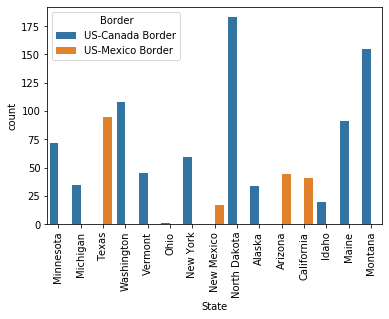

In [96]:
### CHECK VALUES

# barchart
# set parameters
fig =sns.countplot(df['State'],hue='Border',data=df)
plt.xticks(rotation=90)

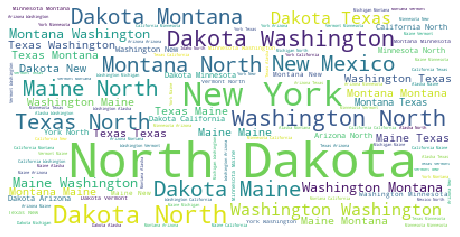

In [154]:
# import useful libraries
from wordcloud import WordCloud

# set parameters
text = " ".join(str(each) for each in df.State)

# create word cloud
wd = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure()
plt.imshow(wd)
plt.axis("off")
plt.show()

**Focus on port names**

In [ ]:
# see number of different port codes
df['Port Code'].unique()

In [70]:
# see number of crossings per port name
df_port = df.groupby('Port Name').sum()
df_port.head()

,Port Code,Value
Port Name,,
Alcan,34144,42898
Alexandria Bay,4956,207379
Algonac,3814,4609
Ambrose,20460,567
Anacortes,6020,11786


In [71]:
# see most popular ports
df_port = df_port.sort_values(['Value'],ascending=[0]) # ascending false maybe
df_port.head()

,Port Code,Value
Port Name,,
San Ysidro,12520,4351210
El Paso,28824,3045989
Detroit,41811,2191846
Laredo,25344,2103190
Otay Mesa,27566,1975461


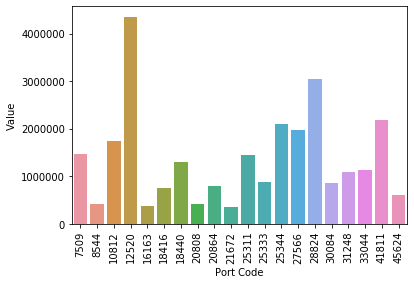

In [72]:
### CHECK VALUES
# a enlever

# barchart
# set parameters
df_port =df_port.iloc[:20,:]
sns.barplot(x='Port Code',y= 'Value',data= df_port)
plt.xticks(rotation=90)

#display
plt.show()

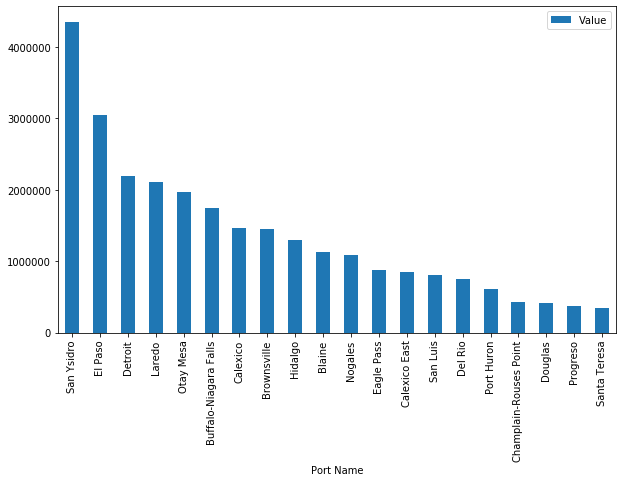

In [75]:
### CHECK VALUES

# barchart
# set parameters
df_port = df_port.drop(columns=['Port Code'])

#display
df_port.plot(kind='bar', figsize=(10, 6), rot=90) 